# Linear Regression Assignment - Comprehensive Study

Student Name: YATHARTH PATHAK

Roll No: CSJMA23001390169

Group/Class: B.TECH CSE-AI 3RD YEAR  

Date: February 2026

Topic: Predicting house prices (using the California Housing dataset).

Dataset: California Housing (built-in from sklearn)  

Objective: Implement Simple, Multiple, Polynomial, Ridge and Lasso Regression.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Load dataset (no CSV needed)
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target   # Target variable (house price in $100,000s)

print("Dataset loaded successfully!")
print("Shape:", df.shape)
print(df.head())

# Save dataset as CSV for GitHub 
df.to_csv('california_housing.csv', index=False)
print("CSV file saved in Colab!")

Dataset loaded successfully!
Shape: (20640, 9)
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
CSV file saved in Colab!


             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

<Figure size 1200x800 with 0 Axes>

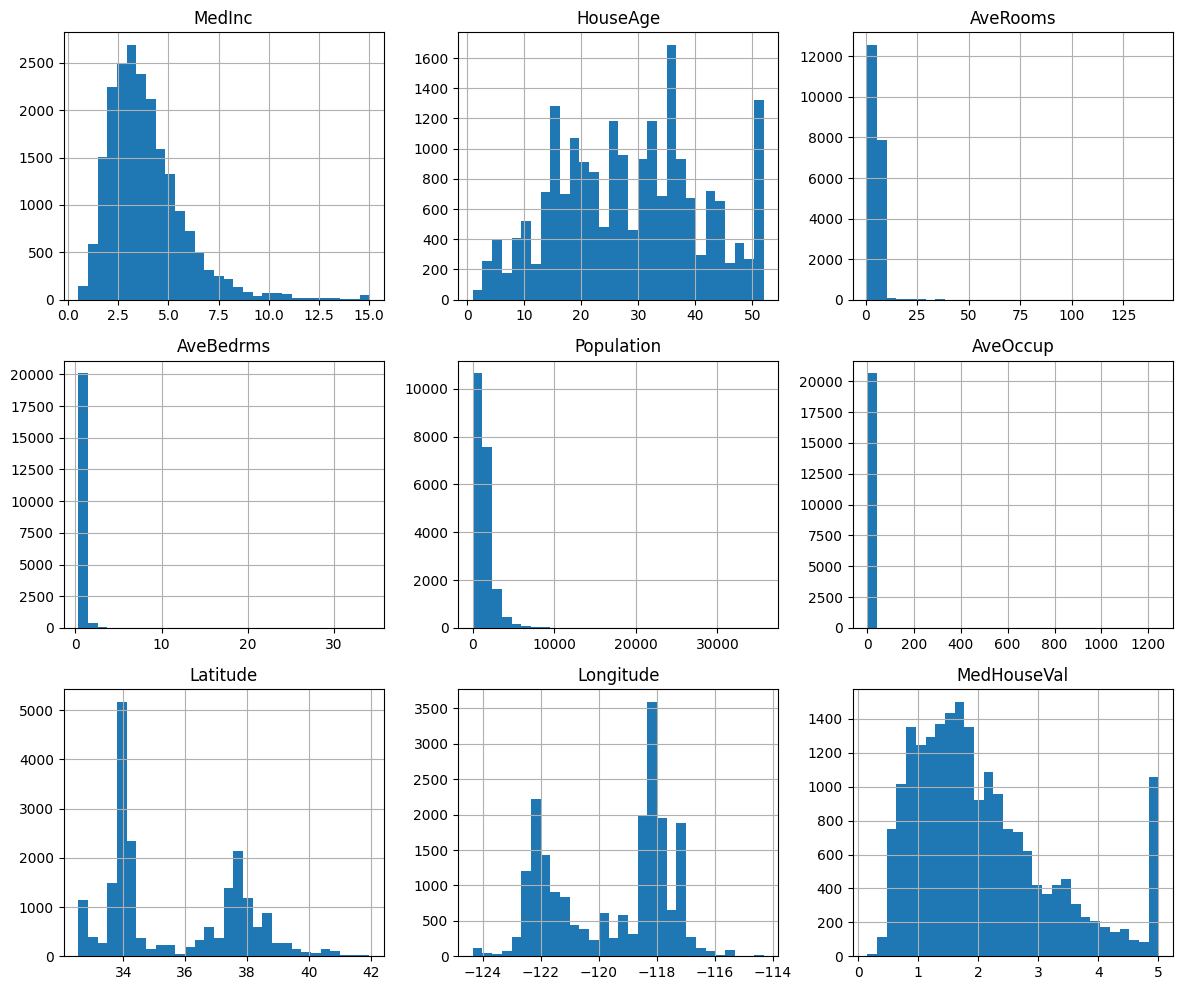

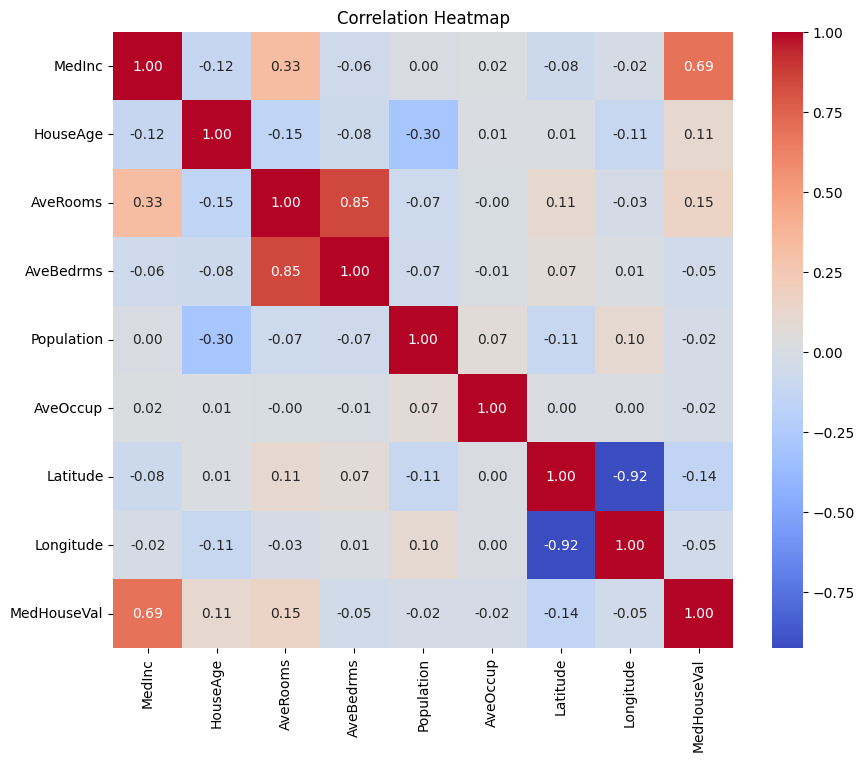

EDA plots saved!


In [4]:
# Part A: EDA
print(df.describe())

# Histograms
plt.figure(figsize=(12,8))
df.hist(bins=30, figsize=(12,10))
plt.tight_layout()
plt.savefig('eda_histograms.png')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')
plt.show()

print("EDA plots saved!")

Simple LR R²: 0.4589
Simple LR RMSE: 0.8421


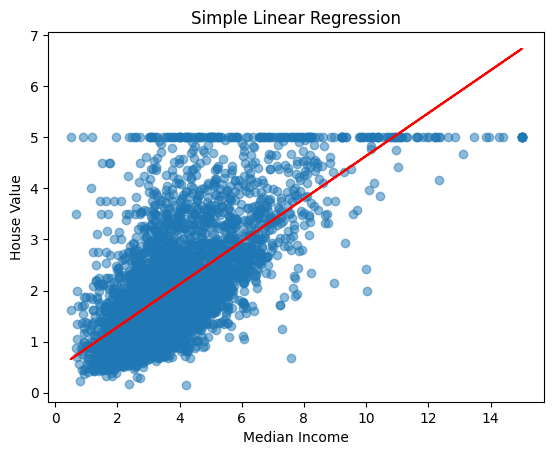

In [5]:
# Part B: Simple Linear Regression (using MedInc)
X_simple = df[['MedInc']]
y = df['MedHouseVal']

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y, test_size=0.2, random_state=42)

model_simple = LinearRegression()
model_simple.fit(X_train_s, y_train_s)
y_pred_simple = model_simple.predict(X_test_s)

print("Simple LR R²:", round(r2_score(y_test_s, y_pred_simple), 4))
print("Simple LR RMSE:", round(np.sqrt(mean_squared_error(y_test_s, y_pred_simple)), 4))

# Plot
plt.scatter(X_test_s, y_test_s, alpha=0.5)
plt.plot(X_test_s, y_pred_simple, color='red')
plt.xlabel('Median Income')
plt.ylabel('House Value')
plt.title('Simple Linear Regression')
plt.savefig('simple_regression.png')
plt.show()

In [6]:
# Part C: Multiple Linear Regression
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_multi = LinearRegression()
model_multi.fit(X_train, y_train)
y_pred_multi = model_multi.predict(X_test)

print("Multiple LR R²:", round(r2_score(y_test, y_pred_multi), 4))
print("Multiple LR RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred_multi)), 4))

# Coefficients
coef = pd.Series(model_multi.coef_, index=X.columns).sort_values(ascending=False)
print("\nCoefficients:\n", coef)

Multiple LR R²: 0.5758
Multiple LR RMSE: 0.7456

Coefficients:
 AveBedrms     0.783145
MedInc        0.448675
HouseAge      0.009724
Population   -0.000002
AveOccup     -0.003526
AveRooms     -0.123323
Latitude     -0.419792
Longitude    -0.433708
dtype: float64


In [7]:
# Part D: Polynomial Regression (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

model_poly = LinearRegression()
model_poly.fit(X_poly_train, y_train)
y_pred_poly = model_poly.predict(X_poly_test)

print("Polynomial (deg=2) R²:", round(r2_score(y_test, y_pred_poly), 4))
print("Polynomial RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred_poly)), 4))

Polynomial (deg=2) R²: 0.6457
Polynomial RMSE: 0.6814


In [8]:
# Part E: Regularization
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
print("Ridge R²:", round(r2_score(y_test, ridge.predict(X_test)), 4))

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
print("Lasso R²:", round(r2_score(y_test, lasso.predict(X_test)), 4))

Ridge R²: 0.5759
Lasso R²: 0.5318


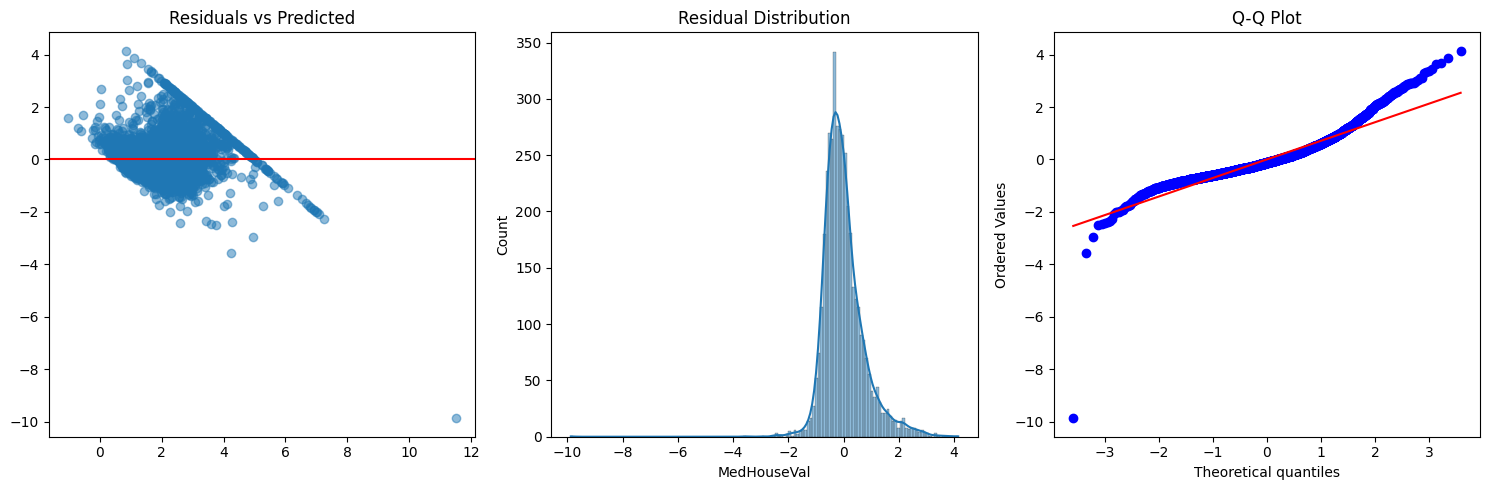

In [9]:
# Part F: Diagnostics
residuals = y_test - y_pred_multi

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(y_pred_multi, residuals, alpha=0.5)
plt.axhline(0, color='red')
plt.title('Residuals vs Predicted')

plt.subplot(1,3,2)
sns.histplot(residuals, kde=True)
plt.title('Residual Distribution')

plt.subplot(1,3,3)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')

plt.tight_layout()
plt.savefig('diagnostics.png')
plt.show()